In [24]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
# from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

In [26]:
rawdata = "cumulative.csv"

In [27]:
raw_df = pd.read_csv(rawdata)
raw_df.head()

,rowid,kepid,kepoi_name,kepler_name,koi_disposition,koi_pdisposition,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,1,10797460,K00752.01,Kepler-227 b,CONFIRMED,CANDIDATE,1.000,0,0,0,...,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,2,10797460,K00752.02,Kepler-227 c,CONFIRMED,CANDIDATE,0.969,0,0,0,...,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
2,3,10811496,K00753.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,0,...,-176.0,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
3,4,10848459,K00754.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,0,...,-174.0,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
4,5,10854555,K00755.01,Kepler-664 b,CONFIRMED,CANDIDATE,1.000,0,0,0,...,-211.0,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509


In [28]:
X=raw_df[["koi_fpflag_nt", "koi_fpflag_ss", "koi_fpflag_co", "koi_fpflag_ec"]]
y= raw_df["koi_pdisposition"].values.reshape(-1, 1)
print(X.shape, y.shape)

(9564, 4) (9564, 1)


In [29]:
ydata = raw_df["koi_pdisposition"]
ybin_encode = pd.get_dummies(ydata, columns=["koi_pdisposition"])
y2 = ybin_encode
y2.head()

,CANDIDATE,FALSE POSITIVE
0,1,0
1,1,0
2,0,1
3,0,1
4,1,0


In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y2, random_state=10)
# X_train.head()
# y_train.head()

In [43]:
X_scaler = MinMaxScaler().fit(X_train)
y_scaler = MinMaxScaler().fit(y_train)

In [44]:
scaled_X_train = X_scaler.transform(X_train)
scaled_X_test = X_scaler.transform(X_test)
scaled_y_train = y_scaler.transform(y_train)
scaled_y_test = y_scaler.transform(y_test)

In [45]:
train_scores = []
test_scores = []
total_scores = []
for k in range (1,15,3):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(scaled_X_train, y_train)
    train_score = knn.score(scaled_X_train, y_train)
    test_score = knn.score(scaled_X_test, y_test)
    total_score = test_score + train_score
    train_scores.append(train_score)
    test_scores.append(test_score)
    total_scores.append(total_score)
    
    print(f"k: {k}, Train+Test=Total Scores: {train_score:.3f}+{test_score:.3f}={total_score:.3f}")

k: 1, Train+Test=Total Scores: 0.986+0.981=1.967
k: 4, Train+Test=Total Scores: 0.986+0.981=1.967
k: 7, Train+Test=Total Scores: 0.986+0.981=1.967
k: 10, Train+Test=Total Scores: 0.986+0.981=1.967
k: 13, Train+Test=Total Scores: 0.986+0.981=1.967


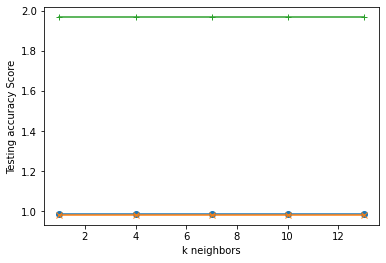

In [47]:
plt.plot(range(1, 15, 3), train_scores, marker='o')
plt.plot(range(1, 15, 3), test_scores, marker="x")
plt.plot(range(1, 15, 3), total_scores, marker='+')
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()

In [49]:
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(scaled_X_train, scaled_y_train)
print('for k=2, Accuracy is: %.2f' % knn.score(scaled_X_test, y_test))

for k=2, Accuracy is: 0.98
